# Gramener Case Study

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sys
from scipy.stats.stats import pearsonr

## Read Data

In [3]:
# Load data
loan=pd.read_csv('loan.csv',encoding="utf8", low_memory=False)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Investigating data
print(loan.shape)
print(loan.info())
print(loan.describe())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.31513

## Assumptions
-> The variables like recoveries, total_pymnt, total_pymnt_inv, total_rec_prncp etc.. which normally get captured only after a loan is accepted, will not be available at the time of a new loan application. So these type of variables can be removed from the dataset. 
-> Since bankruptcy filings, tax liens and judgments are the three kinds of public records that appears on a credit report, this information should already be captured in column pub_rec_bankruptcies which contains derogatory public records.
-> As pub_rec_bankruptcies is super-set and the pub_rec is subset, Hence we can drop column pub_rec.
purpose and title have redundant information.
-> emp_title column has so much discrepancies in its values(e.g. The same employer name is mentioned in various formats) .Also as it has many unique values it would not give any useful insights about the pattern for loan defaulting.

## Data Cleaning

In [5]:
# look for duplicates before data cleaning
print(loan.duplicated().sum())

0


In [6]:
# Percentage of null values in all columns
null_percentage= round(loan.isnull().sum() / len(loan.index) * 100, 2)
print(null_percentage)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
# Remove all the columns which have 90 % or more than 90 % null values
loan = pd.DataFrame(loan.loc[:, (null_percentage < 90.00)])
print(round(loan.isnull().sum() / len(loan.index) * 100, 2))
loan

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# Column "mths_since_last_delinq" has more than 60% null values so remove this column
loan=loan.drop('mths_since_last_delinq',axis=1)
print(round(loan.isnull().sum() / len(loan.index) * 100, 2))
loan

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
print("Total number of unique member in the data set is %d" % loan['member_id'].nunique())

Total number of unique member in the data set is 39717


In [10]:
# Validate all values in column is same by checking unique values in column
uniques = loan.apply(lambda x:x.nunique())
print(uniques)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [11]:
# Remove columns where unique values are 1 as it illustrates that all values are same in column
loan = loan.drop(uniques[uniques <= 1].index, axis = 1)
print(loan.shape)
loan

(39717, 45)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


In [12]:
# Remove unnecessary columns
loan=loan.drop(['id', 'member_id', 'sub_grade', 'url', 'funded_amnt', 'emp_title', 'earliest_cr_line', 'desc',
               'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
               'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
              'collection_recovery_fee', 'inq_last_6mths','title'],axis=1)
print(round(loan.isnull().sum() / len(loan.index) * 100, 2))
loan

loan_amnt               0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
zip_code                0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
open_acc                0.00
pub_rec                 0.00
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies
0,5000,4975.00000,36 months,10.65%,162.87,B,10+ years,RENT,24000.00,Verified,...,Fully Paid,credit_card,860xx,AZ,27.65,0,3,0,83.70%,0.0
1,2500,2500.00000,60 months,15.27%,59.83,C,< 1 year,RENT,30000.00,Source Verified,...,Charged Off,car,309xx,GA,1.00,0,3,0,9.40%,0.0
2,2400,2400.00000,36 months,15.96%,84.33,C,10+ years,RENT,12252.00,Not Verified,...,Fully Paid,small_business,606xx,IL,8.72,0,2,0,98.50%,0.0
3,10000,10000.00000,36 months,13.49%,339.31,C,10+ years,RENT,49200.00,Source Verified,...,Fully Paid,other,917xx,CA,20.00,0,10,0,21%,0.0
4,3000,3000.00000,60 months,12.69%,67.79,B,1 year,RENT,80000.00,Source Verified,...,Current,other,972xx,OR,17.94,0,15,0,53.90%,0.0
5,5000,5000.00000,36 months,7.90%,156.46,A,3 years,RENT,36000.00,Source Verified,...,Fully Paid,wedding,852xx,AZ,11.20,0,9,0,28.30%,0.0
6,7000,7000.00000,60 months,15.96%,170.08,C,8 years,RENT,47004.00,Not Verified,...,Fully Paid,debt_consolidation,280xx,NC,23.51,0,7,0,85.60%,0.0
7,3000,3000.00000,36 months,18.64%,109.43,E,9 years,RENT,48000.00,Source Verified,...,Fully Paid,car,900xx,CA,5.35,0,4,0,87.50%,0.0
8,5600,5600.00000,60 months,21.28%,152.39,F,4 years,OWN,40000.00,Source Verified,...,Charged Off,small_business,958xx,CA,5.55,0,11,0,32.60%,0.0
9,5375,5350.00000,60 months,12.69%,121.45,B,< 1 year,RENT,15000.00,Verified,...,Charged Off,other,774xx,TX,18.08,0,2,0,36.50%,0.0


In [13]:
# look for duplicates after data cleaning 
print(loan.duplicated().sum())

0


### Standardise values

In [14]:
# Convert dates to python datetime object.
loan['issue_d'] = pd.to_datetime(loan["issue_d"], format="%b-%y")
print(loan.dtypes)
loan['issue_d']

loan_amnt                        int64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
open_acc                         int64
pub_rec                          int64
revol_util                      object
pub_rec_bankruptcies           float64
dtype: object


0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
5       2011-12-01
6       2011-12-01
7       2011-12-01
8       2011-12-01
9       2011-12-01
10      2011-12-01
11      2011-12-01
12      2011-12-01
13      2011-12-01
14      2011-12-01
15      2011-12-01
16      2011-12-01
17      2011-12-01
18      2011-12-01
19      2011-12-01
20      2011-12-01
21      2011-12-01
22      2011-12-01
23      2011-12-01
24      2011-12-01
25      2011-12-01
26      2011-12-01
27      2011-12-01
28      2011-12-01
29      2011-12-01
           ...    
39687   2007-08-01
39688   2007-08-01
39689   2007-07-01
39690   2007-07-01
39691   2007-07-01
39692   2007-07-01
39693   2007-07-01
39694   2007-07-01
39695   2007-07-01
39696   2007-07-01
39697   2007-07-01
39698   2007-07-01
39699   2007-07-01
39700   2007-07-01
39701   2007-07-01
39702   2007-07-01
39703   2007-07-01
39704   2007-07-01
39705   2007-07-01
39706   2007-07-01
39707   2007-07-01
39708   2007

In [15]:
# funded_amnt_inv, installment Round to 2 decimal places.
loan['funded_amnt_inv'] = round(loan['funded_amnt_inv'], 2)
print(loan['funded_amnt_inv'])
loan['installment'] = round(loan["installment"], 2)
print(loan["installment"])

0         4975.00
1         2500.00
2         2400.00
3        10000.00
4         3000.00
5         5000.00
6         7000.00
7         3000.00
8         5600.00
9         5350.00
10        6500.00
11       12000.00
12        9000.00
13        3000.00
14       10000.00
15        1000.00
16       10000.00
17        3600.00
18        6000.00
19        9200.00
20       19142.16
21       21000.00
22       10000.00
23       10000.00
24        6000.00
25       15000.00
26        8725.00
27        5000.00
28        4000.00
29        8500.00
           ...   
39687     2500.00
39688     2800.00
39689        0.00
39690     1525.00
39691      550.00
39692     1775.00
39693     1200.00
39694     4150.00
39695     3100.00
39696      525.00
39697      400.00
39698      675.00
39699      575.00
39700      200.00
39701      600.00
39702      850.00
39703     2550.00
39704      950.00
39705      250.00
39706      150.00
39707      525.00
39708      375.00
39709      675.00
39710      250.00
39711     

In [16]:
# Strip '%' from ‘int_rate’ Column.
loan["int_rate"] = loan["int_rate"].str.replace("%", "").astype("float64")

# round to 2 decimal places
loan['int_rate'] = round(loan['int_rate'], 2)
print(loan["int_rate"])

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
         ...  
39687    12.49
39688    13.43
39689    11.54
39690    10.59
39691    15.96
39692     9.01
39693     9.96
39694     7.43
39695     7.43
39696    10.59
39697    10.28
39698     9.01
39699     8.38
39700     7.75
39701     8.38
39702    11.22
39703    10.28
39704     8.70
39705     7.43
39706     8.07
39707     9.33
39708     9.96
39709    11.22
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64


In [17]:
# Strip '%' from ‘revol_util’ Column.
loan["revol_util"] = loan["revol_util"].str.replace("%", "").astype("float64")

# round to 2 decimal places
loan['revol_util'] = round(loan['revol_util'], 2)
print(loan["revol_util"])

0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
5        28.30
6        85.60
7        87.50
8        32.60
9        36.50
10       20.60
11       67.10
12       91.70
13       43.10
14       55.50
15       81.50
16       70.20
17       16.00
18       37.73
19       23.10
20       85.60
21       90.30
22       82.40
23       91.80
24       29.70
25       93.90
26       57.60
27       59.50
28       37.70
29       59.10
         ...  
39687    93.40
39688    74.10
39689    75.80
39690     8.10
39691    92.30
39692    36.60
39693    41.10
39694    19.50
39695     6.80
39696    23.30
39697    54.40
39698    37.60
39699    23.90
39700    16.50
39701    14.40
39702    47.10
39703     0.00
39704     7.80
39705    16.90
39706    26.30
39707    39.20
39708    48.60
39709    16.10
39710     0.60
39711    23.00
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: float64


In [18]:
# Column emp_length replace '< 1' with 0 and strip the sub string '+' and ‘years’
loan["emp_length"] = loan["emp_length"].str.replace("< 1", "0")
intab = "+years"
outtab = "      "
trantab = str.maketrans(intab, outtab)
loan["emp_length"] = loan["emp_length"].str.translate(trantab).astype("float64")
loan["emp_length"]

0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
5         3.0
6         8.0
7         9.0
8         4.0
9         0.0
10        5.0
11       10.0
12        0.0
13        3.0
14        3.0
15        0.0
16        4.0
17       10.0
18        1.0
19        6.0
20        3.0
21       10.0
22       10.0
23        5.0
24        1.0
25        2.0
26        9.0
27        2.0
28       10.0
29        0.0
         ... 
39687     9.0
39688     6.0
39689     0.0
39690     3.0
39691     1.0
39692     1.0
39693     0.0
39694     8.0
39695     7.0
39696     2.0
39697     0.0
39698     1.0
39699     4.0
39700     0.0
39701     7.0
39702     1.0
39703     2.0
39704     0.0
39705     8.0
39706     0.0
39707     2.0
39708     4.0
39709     0.0
39710     1.0
39711     5.0
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39717, dtype: float64

In [19]:
# impute employee length with mean
loan.emp_length.fillna(loan.emp_length.mean(),inplace = True)

# round to 2 decimal places
loan['emp_length'] = round(loan['emp_length'], 2)
print(loan["emp_length"])

0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
5         3.0
6         8.0
7         9.0
8         4.0
9         0.0
10        5.0
11       10.0
12        0.0
13        3.0
14        3.0
15        0.0
16        4.0
17       10.0
18        1.0
19        6.0
20        3.0
21       10.0
22       10.0
23        5.0
24        1.0
25        2.0
26        9.0
27        2.0
28       10.0
29        0.0
         ... 
39687     9.0
39688     6.0
39689     0.0
39690     3.0
39691     1.0
39692     1.0
39693     0.0
39694     8.0
39695     7.0
39696     2.0
39697     0.0
39698     1.0
39699     4.0
39700     0.0
39701     7.0
39702     1.0
39703     2.0
39704     0.0
39705     8.0
39706     0.0
39707     2.0
39708     4.0
39709     0.0
39710     1.0
39711     5.0
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39717, dtype: float64


In [20]:
# Check the home_ownership column and perform imputation
print(loan["home_ownership"].unique())
print(loan["home_ownership"].value_counts())

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


In [21]:
# Remove rows which has “NONE” as the value in “home_ownership” column.
loan = loan[loan['home_ownership'] != 'NONE']
print(loan["home_ownership"].unique())
print(loan["home_ownership"].value_counts())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
Name: home_ownership, dtype: int64


In [22]:
# Remove 'xx' from 'zip_code'
loan["zip_code"] = loan["zip_code"].str.replace('xx', '')
loan["zip_code"]

0        860
1        309
2        606
3        917
4        972
5        852
6        280
7        900
8        958
9        774
10       853
11       913
12       245
13       606
14       951
15       641
16       921
17       067
18       890
19       921
20       770
21       335
22       799
23       917
24       900
25       605
26       103
27       150
28       326
29       564
        ... 
39687    334
39688    331
39689    041
39690    330
39691    021
39692    100
39693    339
39694    303
39695    017
39696    113
39697    805
39698    222
39699    469
39700    306
39701    461
39702    314
39703    100
39704    017
39705    017
39706    530
39707    530
39708    333
39709    537
39710    537
39711    804
39712    802
39713    274
39714    017
39715    208
39716    027
Name: zip_code, Length: 39714, dtype: object

In [23]:
# Combine ‘zip_code’ and 'addr_state' to one column as 'address'
loan['address'] = loan["addr_state"].astype(str) + "," + loan["zip_code"].astype(str)
loan['address']

0        AZ,860
1        GA,309
2        IL,606
3        CA,917
4        OR,972
5        AZ,852
6        NC,280
7        CA,900
8        CA,958
9        TX,774
10       AZ,853
11       CA,913
12       VA,245
13       IL,606
14       CA,951
15       MO,641
16       CA,921
17       CT,067
18       UT,890
19       CA,921
20       TX,770
21       FL,335
22       TX,799
23       CA,917
24       CA,900
25       IL,605
26       NY,103
27       PA,150
28       FL,326
29       MN,564
          ...  
39687    FL,334
39688    FL,331
39689    ME,041
39690    FL,330
39691    MA,021
39692    NY,100
39693    FL,339
39694    GA,303
39695    MA,017
39696    NY,113
39697    CO,805
39698    VA,222
39699    IN,469
39700    GA,306
39701    IN,461
39702    GA,314
39703    NY,100
39704    MA,017
39705    MA,017
39706    WI,530
39707    WI,530
39708    FL,333
39709    WI,537
39710    WI,537
39711    CO,804
39712    CO,802
39713    NC,274
39714    MA,017
39715    MD,208
39716    MA,027
Name: address, Length: 3

In [24]:
# Percentage of null values in all columns
print(round(loan.isnull().sum() / len(loan.index) * 100, 2))

loan_amnt               0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
emp_length              0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
zip_code                0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
open_acc                0.00
pub_rec                 0.00
revol_util              0.13
pub_rec_bankruptcies    1.75
address                 0.00
dtype: float64


In [25]:
# Get the number of retained rows using 'len()'
# Get the percentage of retained rows by dividing the current number of rows with initial number of rows
print(len(loan.columns))
print(len(loan.index))
print(len(loan.index)/39717)

22
39714
0.9999244655940781


## Univariate Analysis

In [26]:
# Gather data for Meta Data Description
print(loan.info())
loan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 22 columns):
loan_amnt               39714 non-null int64
funded_amnt_inv         39714 non-null float64
term                    39714 non-null object
int_rate                39714 non-null float64
installment             39714 non-null float64
grade                   39714 non-null object
emp_length              39714 non-null float64
home_ownership          39714 non-null object
annual_inc              39714 non-null float64
verification_status     39714 non-null object
issue_d                 39714 non-null datetime64[ns]
loan_status             39714 non-null object
purpose                 39714 non-null object
zip_code                39714 non-null object
addr_state              39714 non-null object
dti                     39714 non-null float64
delinq_2yrs             39714 non-null int64
open_acc                39714 non-null int64
pub_rec                 39714 non-null int64
revol_u

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,address
0,5000,4975.00,36 months,10.65,162.87,B,10.0,RENT,24000.00,Verified,...,credit_card,860,AZ,27.65,0,3,0,83.70,0.0,"AZ,860"
1,2500,2500.00,60 months,15.27,59.83,C,0.0,RENT,30000.00,Source Verified,...,car,309,GA,1.00,0,3,0,9.40,0.0,"GA,309"
2,2400,2400.00,36 months,15.96,84.33,C,10.0,RENT,12252.00,Not Verified,...,small_business,606,IL,8.72,0,2,0,98.50,0.0,"IL,606"
3,10000,10000.00,36 months,13.49,339.31,C,10.0,RENT,49200.00,Source Verified,...,other,917,CA,20.00,0,10,0,21.00,0.0,"CA,917"
4,3000,3000.00,60 months,12.69,67.79,B,1.0,RENT,80000.00,Source Verified,...,other,972,OR,17.94,0,15,0,53.90,0.0,"OR,972"
5,5000,5000.00,36 months,7.90,156.46,A,3.0,RENT,36000.00,Source Verified,...,wedding,852,AZ,11.20,0,9,0,28.30,0.0,"AZ,852"
6,7000,7000.00,60 months,15.96,170.08,C,8.0,RENT,47004.00,Not Verified,...,debt_consolidation,280,NC,23.51,0,7,0,85.60,0.0,"NC,280"
7,3000,3000.00,36 months,18.64,109.43,E,9.0,RENT,48000.00,Source Verified,...,car,900,CA,5.35,0,4,0,87.50,0.0,"CA,900"
8,5600,5600.00,60 months,21.28,152.39,F,4.0,OWN,40000.00,Source Verified,...,small_business,958,CA,5.55,0,11,0,32.60,0.0,"CA,958"
9,5375,5350.00,60 months,12.69,121.45,B,0.0,RENT,15000.00,Verified,...,other,774,TX,18.08,0,2,0,36.50,0.0,"TX,774"


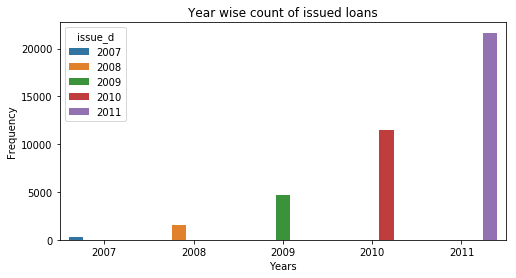

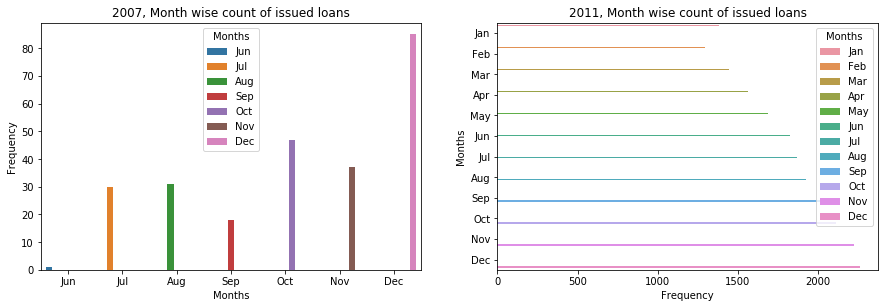

In [27]:
# Analysis of loans Issued per year
plt.figure(figsize=(8, 4))
yearwise_loans_issued = loan.groupby(loan.issue_d.dt.year).size().reset_index(name='Frequency')
sns.barplot(x= 'issue_d',y='Frequency',data=yearwise_loans_issued,hue='issue_d')
plt.title('Year wise count of issued loans')
plt.xlabel('Years')
plt.ylabel('Frequency')

   
# Plot 2007 month wise bar chart of issue_d column
# Set figure size
plt.figure(figsize=(15, 10))

# Subplot 1:
plt.subplot(221)
loans_issued_2007 = loan[loan.issue_d.dt.year == 2007].groupby([loan.issue_d.dt.month]).size().reset_index(name='Frequency')
loans_issued_2007['Months'] = loans_issued_2007.issue_d.apply(lambda x: datetime.date(1900, x, 1).strftime('%b'))
sns.barplot(x='Months',y='Frequency',data=loans_issued_2007,hue='Months')
plt.title('2007, Month wise count of issued loans')
plt.xlabel('Months')
plt.ylabel('Frequency')

# Plot 2011 month wise bar chart of issue_d column
# Subplot 2:
plt.subplot(222)
loans_issued_2011 = loan[loan.issue_d.dt.year == 2011].groupby([loan.issue_d.dt.month]).size().reset_index(name='Frequency')
loans_issued_2011['Months'] = loans_issued_2011.issue_d.apply(lambda x: datetime.date(1900, x, 1).strftime('%b'))
sns.barplot(x='Frequency',y='Months',data=loans_issued_2011,hue='Months')
plt.title('2011, Month wise count of issued loans')
plt.xlabel('Frequency')
plt.ylabel('Months')

plt.show()

Inference: The Number of issued loans increases year by year.
	Percentage increase for year 2007 = 0 %
	Percentage increase for year 2008 = 527 %
	Percentage increase for year 2009 = 202 %
	Percentage increase for year 2010 = 145 %
	Percentage increase for year 2011 = 88 %

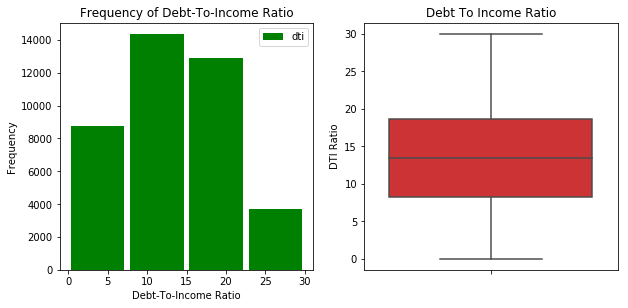

In [28]:
# Analysis of Debt-To-Income Ratio(dti)
# Frequency Chart
plt.figure(figsize=(10,10))
dti = loan['dti']
legend = ['dti']
plt.subplot(2,2,1)
plt.hist([dti], color=['green'], bins=4, rwidth=0.9)
plt.xlabel("Debt-To-Income Ratio")
plt.ylabel("Frequency")
plt.legend(legend)
plt.xticks(np.arange(min(dti), max(dti)+5, 5))
plt.title('Frequency of Debt-To-Income Ratio')

# Debt-To-Income Ratio(dti) is the percentage of a consumer's monthly gross income that goes toward paying debts excluding mortgage and the requested LC loan
plt.subplot(2,2,2)
ax = sns.boxplot(y='dti', data=loan, palette='Set1')
plt.ylabel('DTI Ratio')
plt.title('Debt To Income Ratio')
plt.show()

Inference: 
dti values are equally distributed along the median between 25-75 percentile with max value,approximately at 30, minimum at 0 and maximum borrowers given loan having DTI value between 10-15%

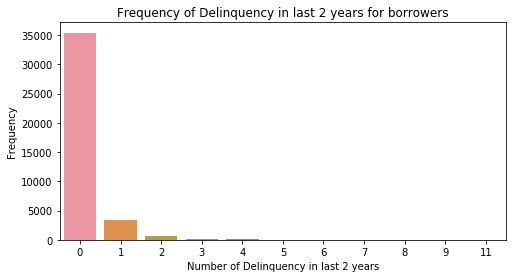

In [29]:
# Analysis of Delinquency in past 2 Years(delinq_2yrs)
# Delinquency in past 2 Years(delinq_2yrs) is The number of 30+ days past-due incidences of delinquency ( failure to make a required payment )in the borrower's credit file for the past 2 years 
plt.figure(figsize=(8,4))
delinq_2yrs_values = pd.DataFrame(loan['delinq_2yrs'].value_counts())
sns.barplot(x=delinq_2yrs_values.index, y="delinq_2yrs", data=delinq_2yrs_values)
plt.xlabel("Number of Delinquency in last 2 years")
plt.ylabel("Frequency")
plt.title('Frequency of Delinquency in last 2 years for borrowers')
plt.show()

Inference:
Most of the delinq_2yrs values are 0 and hence highest frequency is for value 0. 
There are some outliers and the max value is 11.

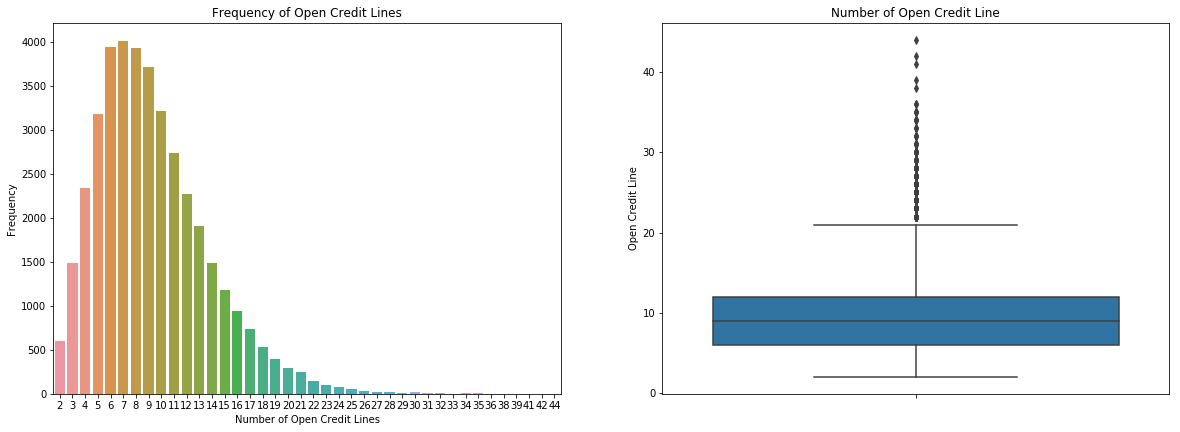

In [30]:
# Analysis of Number of open credit lines in the borrower's credit file(open_acc)
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
open_acc_values = pd.DataFrame(loan['open_acc'].value_counts())
sns.barplot(x=open_acc_values.index, y="open_acc", data=open_acc_values)
plt.xlabel("Number of Open Credit Lines")
plt.ylabel("Frequency")
plt.title('Frequency of Open Credit Lines')

plt.subplot(2,2,2)
sns.boxplot(y=loan['open_acc'])
plt.ylabel('Open Credit Line')
plt.title('Number of Open Credit Line')
plt.show()

In [31]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [32]:
#as there are large percentage of the columns having 0 as value
# therefore we can impute the value 0 for the null value in this columns
loan.pub_rec_bankruptcies.fillna(0, inplace=True)
loan.pub_rec_bankruptcies.isnull().sum()

0

In [33]:
#We will have to look at the columns pub_rec_bankruptcies
# Create a function to be applied
def is_bankrupt(x):
    if (x>0): 
        return 1
    else:
        return 0


loan['is_pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].apply(is_bankrupt)


In [34]:
# Loan defaulter is_bankrupt
print(pd.pivot_table(loan, index="loan_status", columns="is_pub_rec_bankruptcies", aggfunc="size"))

is_pub_rec_bankruptcies      0     1
loan_status                         
Charged Off               5259   368
Current                   1101    39
Fully Paid               31673  1274


In [35]:
# Imputing missing values with median for Revolving line utilization rate(revol_util)
# revol_util is the Percentage of credit the borrower is using relative to all available revolving credit.
# Check how many null values are there
print(loan.revol_util.isnull().sum())
# Check the description now
print(loan.revol_util.describe())
print('Mean(', round(loan.revol_util.mean(), 2), ') and Median(', loan.revol_util.median(),
      ') values are close , imputing missing values with median')
loan.loc[loan.revol_util.isnull(),'revol_util'] =  loan.revol_util.median()

50
count    39664.000000
mean        48.834875
std         28.331964
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64
Mean( 48.83 ) and Median( 49.3 ) values are close , imputing missing values with median


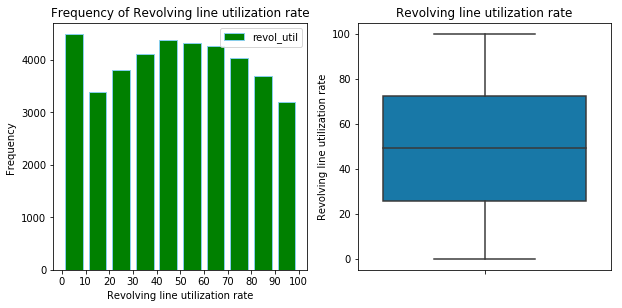

In [36]:
#Revolving line utilization rate(revol_util)
#Frequency Chart
plt.figure(figsize=(10,10))
revol_util = loan['revol_util']
legend = ['revol_util']
plt.subplot(2,2,1)
plt.hist([revol_util], color = "green", ec="skyblue", bins=10, rwidth=0.75)
plt.xlabel("Revolving line utilization rate")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(revol_util), max(revol_util)+10, 10))
plt.legend(legend)
plt.title('Frequency of Revolving line utilization rate')


# Ploting revo_util column
plt.subplot(2,2,2)
sns.boxplot(y=loan['revol_util'], palette='winter')
plt.ylabel('Revolving line utilization rate')
plt.title('Revolving line utilization rate')

plt.show()

Inference:
'revol_util' values are equally distributed along the median between 25-75 percentile with max value near 100 and maximum borrowers having revolving credit utilisation rate in between 0-10%.


loan amount
	Mean = 11219.868308405097
	Median = 10000.0
	Mode = 0    10000
dtype: int64


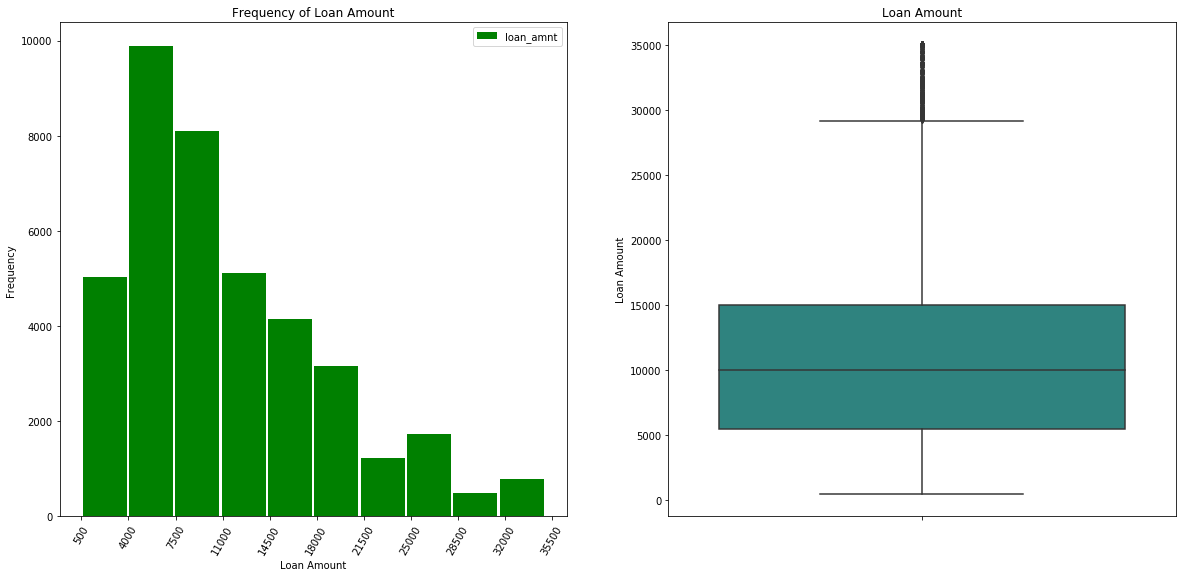

In [37]:
# Analysis of quantitative variable loan_amnt
print('\nloan amount')
print('\tMean =',  loan.loan_amnt.mean())
print('\tMedian =',  loan.loan_amnt.median())
print('\tMode =',  loan.loan_amnt.mode())

plt.figure(figsize=(20,20))

#Frequency Chart
loan_amnt = loan['loan_amnt']
legend = ['loan_amnt']
plt.subplot(2,2,1)
plt.hist([loan_amnt], color = "green", bins=10, rwidth=0.95)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(loan_amnt), max(loan_amnt)+3500, 3500), rotation=60)
plt.legend(legend)
plt.title('Frequency of Loan Amount')

# Plotting the distribution plot of loan_amnt to visualise their distribution
plt.subplot(2,2,2)
sns.boxplot(y=loan['loan_amnt'], palette='viridis')
plt.ylabel('Loan Amount')
plt.title('Loan Amount')

plt.show()

Inference: 
The 'Loan Amount' most frequently taken is between 4000 to 7500. But there are clearly some outliers above 98 percentile

Mean of funded_amnt_inv =  10398.11
Median of funded_amnt_inv =  8975.0
Mode of funded_amnt_inv =  0    5000.0
dtype: float64


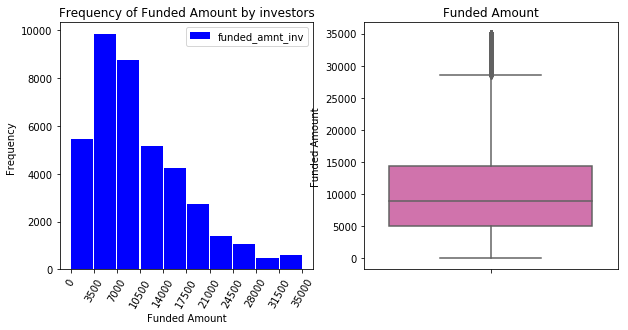

In [38]:
# Analysis of quantitative variable funded_amnt_inv
print('Mean of funded_amnt_inv = ', round(loan.funded_amnt_inv.mean(), 2))
print('Median of funded_amnt_inv = ', loan.funded_amnt_inv.median())
print('Mode of funded_amnt_inv = ', loan.funded_amnt_inv.mode())

#Frequency Chart
plt.figure(figsize=(10,10))
funded_amnt_inv = loan['funded_amnt_inv']
legend = ['funded_amnt_inv']
plt.subplot(2,2,1)
plt.hist([funded_amnt_inv], color = "blue", bins=10, rwidth=0.95)
plt.xlabel("Funded Amount")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(funded_amnt_inv), max(funded_amnt_inv)+3500, 3500), rotation=60)
plt.legend(legend)
plt.title('Frequency of Funded Amount by investors')

# Plotting the distribution plot of funded_amnt_inv to visualise their distribution
plt.subplot(2,2,2)
sns.boxplot(y=loan['funded_amnt_inv'], palette='PuRd')
plt.ylabel('Funded Amount')
plt.title('Funded Amount')

plt.show()

Inference: 
From the 'Funded Amount investors' most frequently invested is between 3500 to 7000 . But there are clearly some outliers above 98 percentile

Mean of int_rate =  12.02
Median of int_rate =  11.86
Mode of int_rate =  0    10.99
dtype: float64


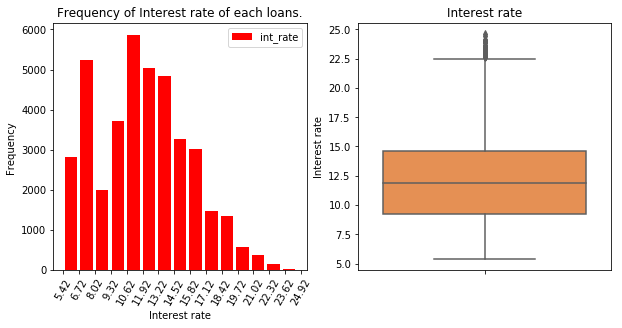

In [39]:
# Analysis of quantitative variable int_rate
print('Mean of int_rate = ', round(loan.int_rate.mean(), 2))
print('Median of int_rate = ', loan.int_rate.median())
print('Mode of int_rate = ', loan.int_rate.mode())

#Frequency Chart
plt.figure(figsize=(10,10))
int_rate = loan['int_rate']
legend = ['int_rate']
plt.subplot(2,2,1)
plt.hist([int_rate], color = "red", bins=15, rwidth=0.80)
plt.xlabel("Interest rate")
plt.ylabel("Frequency ")
plt.xticks(np.arange(min(int_rate), max(int_rate)+1.3, 1.3), rotation=60)
plt.legend(legend)
plt.title('Frequency of Interest rate of each loans.')

# Plotting the distribution plot of int_rate to visualise their distribution
plt.subplot(2,2,2)
sns.boxplot(y=loan['int_rate'], palette='Oranges')
plt.ylabel('Interest rate')
plt.title('Interest rate')


plt.show()

Inference:
From the 'Interest rate' most frequent Interest rate is between 10.6% to 11.9% . But there are clearly some outliers above 98 percentile.

purpose
small_business        13567.272976
house                 13070.997375
debt_consolidation    12695.134120
credit_card           11723.615984
home_improvement      11537.205981
wedding                9876.029567
renewable_energy       8717.233010
medical                8263.672439
major_purchase         8155.429813
other                  8069.951140
educational            6810.461538
car                    6777.517753
moving                 6650.171527
vacation               5463.320210
Name: loan_amnt, dtype: float64


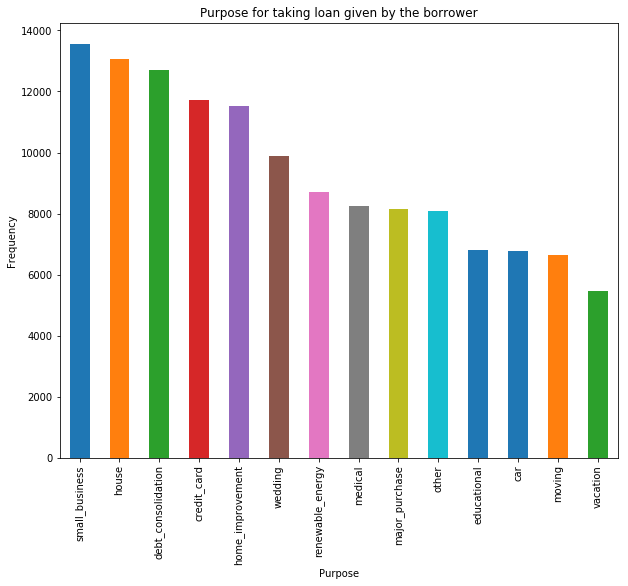

In [40]:
# Analysis of purpose for taking loan given by the borrower
plt.figure(figsize=(10,8))
loan_by_purpose = (loan.groupby('purpose')['loan_amnt'].mean()).sort_values(ascending = False)
print(loan_by_purpose)
loan_by_purpose.plot(kind='bar')
plt.title('Purpose for taking loan given by the borrower')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.show()

Inference: Most of the loans are taken for debt Consolidation.

The unique values in term column are,  [' 36 months' ' 60 months']


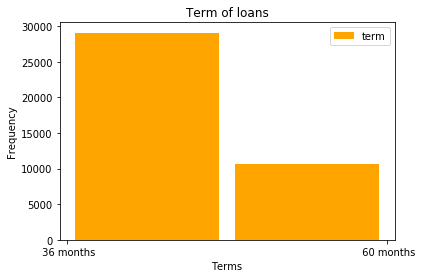

In [41]:
# Analysis of term column
print('The unique values in term column are, ', loan['term'].unique())
terms = loan['term']

legend = ['term']
plt.hist([terms], bins=2, rwidth=0.9, color='orange')
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.xticks(terms.unique())
plt.legend(legend)
plt.title('Term of loans')
plt.show()

Inference:
The most frequent term for loans is 36 months

count    39714.000000
mean       324.573112
std        208.877080
min         15.690000
50%        280.230000
75%        430.780000
80%        483.380000
85%        531.000000
90%        622.961000
95%        763.030500
100%      1305.190000
max       1305.190000
Name: installment, dtype: float64


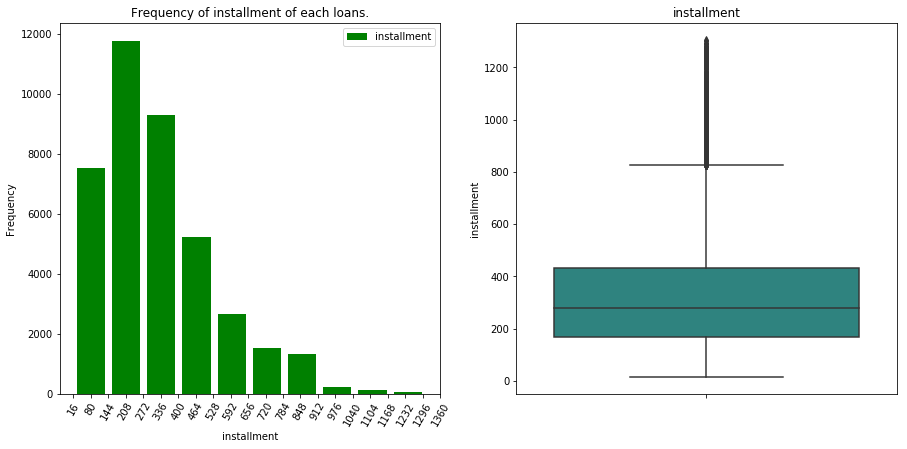

In [42]:
# Analysis of installment
print(loan['installment'].describe(percentiles=[0.75, 0.80, 0.85, 0.90, 0.95, 1]))

#Frequency Chart
plt.figure(figsize=(15,15))
installment = loan['installment']
legend = ['installment']
plt.subplot(2,2,1)
plt.hist([installment], color = "green", bins=10, rwidth=0.80)
plt.xlabel("installment")
plt.ylabel("Frequency ")
plt.legend(legend)
plt.xticks(np.arange(min(installment), max(installment)+64, 64), rotation=60)
plt.title('Frequency of installment of each loans.')

# Plotting the distribution plot of installment to visualise their distribution
plt.subplot(2,2,2)
sns.boxplot(y=loan['installment'], palette='viridis')
plt.ylabel('installment')
plt.title('installment')
plt.show()

Inference:
From the 'installment' column most frequent installment is between 144 to 270 . But there are clearly some outliers above 98 percentile.

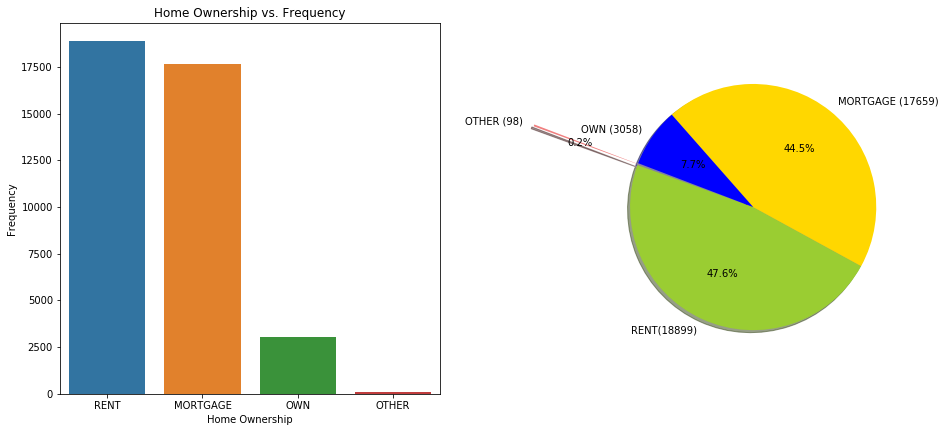

In [43]:
# Analysis of Home Owner Ship variable
home_ownership = loan["home_ownership"].value_counts()

plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.barplot(x=home_ownership.index, y=home_ownership)
plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.title('Home Ownership vs. Frequency')

# Data's to plot
chart_label_home_ownership = [home_ownership.index[0] + "(" + str(home_ownership.iloc[0]) + ')',
                              home_ownership.index[1] + " (" + str(home_ownership.iloc[1]) + ')',
                              home_ownership.index[2] + " (" + str(home_ownership.iloc[2]) + ')',
                              home_ownership.index[3] + " (" + str(home_ownership.iloc[3]) + ')']

colors = ['yellowgreen','gold',  'b','lightcoral']
explode = (0, 0, 0, 0.9)  # explode 1st slice

# Plot pie chart
plt.subplot(2,2,2)
plt.pie(home_ownership, explode=explode, labels=chart_label_home_ownership, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.show()


Inference:
People who are staying on rented house are taking most of the loans,followed by people staying in a mortgaged home.

In [44]:
loan.loc[loan['annual_inc'] > 200000]

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,zip_code,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,address,is_pub_rec_bankruptcies
170,25000,25000.00,36 months,12.42,835.39,B,2.0,RENT,225000.00,Verified,...,085,NJ,8.32,1,11,0,34.6,0.0,"NJ,085",0
336,35000,21739.75,60 months,17.27,578.71,D,8.0,MORTGAGE,208000.00,Source Verified,...,207,MD,7.94,0,11,0,23.5,0.0,"MD,207",0
392,5000,5000.00,36 months,6.62,153.52,A,1.0,RENT,276000.00,Source Verified,...,331,FL,1.82,0,7,0,56.0,0.0,"FL,331",0
567,2000,2000.00,36 months,9.91,64.45,B,1.0,MORTGAGE,231252.00,Source Verified,...,300,GA,11.43,0,19,0,93.5,0.0,"GA,300",0
717,28000,28000.00,36 months,15.96,983.85,C,5.0,MORTGAGE,235000.00,Source Verified,...,201,VA,9.08,0,10,0,82.7,0.0,"VA,201",0
836,35000,22875.00,60 months,19.03,593.77,E,4.0,MORTGAGE,235000.00,Verified,...,913,CA,14.08,0,13,0,83.8,0.0,"CA,913",0
1210,12000,12000.00,36 months,6.03,365.23,A,6.0,MORTGAGE,243600.00,Verified,...,327,FL,6.45,0,8,0,19.7,0.0,"FL,327",0
1348,35000,35000.00,36 months,7.90,1095.16,A,0.0,MORTGAGE,264000.00,Source Verified,...,334,FL,2.45,0,12,0,59.3,0.0,"FL,334",0
1366,20000,20000.00,36 months,9.91,644.50,B,10.0,MORTGAGE,210000.00,Verified,...,145,NY,17.86,0,7,0,90.3,0.0,"NY,145",0
1463,30000,30000.00,60 months,20.30,799.84,E,0.0,MORTGAGE,525000.00,Verified,...,335,FL,8.50,0,14,0,75.0,0.0,"FL,335",0


count    3.971400e+04
mean     6.896804e+04
std      6.379504e+04
min      4.000000e+03
0%       4.000000e+03
25%      4.040450e+04
50%      5.900000e+04
75%      8.229900e+04
85%      1.000000e+05
90%      1.160000e+05
95%      1.420000e+05
100%     6.000000e+06
max      6.000000e+06
Name: annual_inc, dtype: float64


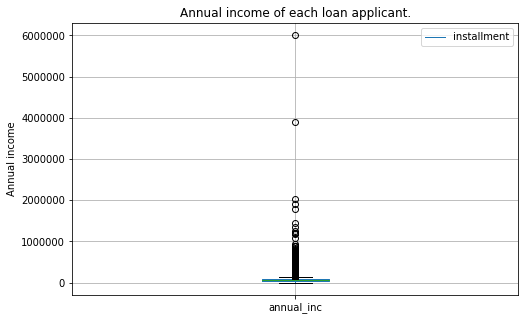

0    60000.0
dtype: float64


In [45]:
# Analysis of annual income variable
plt.figure(figsize=(8,5))
# Plott the distribution plot for annual_inc to visualise their distribution
print(loan['annual_inc'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 1]))

# Plotting the distribution plot of annual_inc to visualise their distribution
loan.boxplot(column='annual_inc')
plt.ylabel('Annual income')
plt.legend(legend)
plt.title('Annual income of each loan applicant.')
plt.show()
annual_inc_mode = loan['annual_inc'].mode()
print(annual_inc_mode)

Inference:
    From the 'Annual income' column the mode of Annual income is 60000.0. Since there are clearly some outliers above 98 percentile this has to be removed.

In [46]:
# Removing outliers in annual income
loan = loan[loan.annual_inc <=loan.annual_inc.quantile(.98)]
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38920 entries, 0 to 39716
Data columns (total 23 columns):
loan_amnt                  38920 non-null int64
funded_amnt_inv            38920 non-null float64
term                       38920 non-null object
int_rate                   38920 non-null float64
installment                38920 non-null float64
grade                      38920 non-null object
emp_length                 38920 non-null float64
home_ownership             38920 non-null object
annual_inc                 38920 non-null float64
verification_status        38920 non-null object
issue_d                    38920 non-null datetime64[ns]
loan_status                38920 non-null object
purpose                    38920 non-null object
zip_code                   38920 non-null object
addr_state                 38920 non-null object
dti                        38920 non-null float64
delinq_2yrs                38920 non-null int64
open_acc                   38920 non-null int6

count     38920.000000
mean      64092.336804
std       32371.288265
min        4000.000000
50%       58000.000000
75%       80000.000000
80%       87600.000000
85%       96000.000000
90%      110000.000000
95%      129996.200000
100%     187000.000000
max      187000.000000
Name: annual_inc, dtype: float64


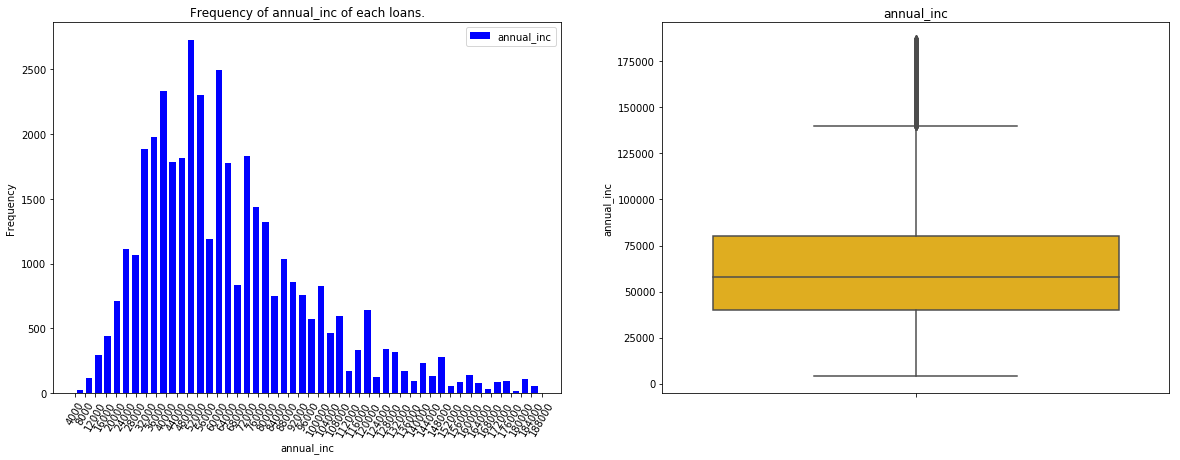

In [47]:
# Plotting annual income after removing outliers
print(loan['annual_inc'].describe(percentiles=[0.75, 0.80, 0.85, 0.90, 0.95, 1]))
plt.figure(figsize=(20,15))

#Frequency Chart
annual_inc = loan['annual_inc']
legend = ['annual_inc']
plt.subplot(2,2,1)
plt.hist([annual_inc], color = "blue", bins=50, rwidth=0.70)
plt.xlabel("annual_inc")
plt.ylabel("Frequency ")
plt.legend(legend)
plt.xticks(np.arange(min(annual_inc), max(annual_inc)+4000, 4000), rotation=60)
plt.title('Frequency of annual_inc of each loans.')

# Plotting the distribution plot of installment to visualise their distribution

plt.subplot(2,2,2)
sns.boxplot(y=loan['annual_inc'], palette='Wistia')
plt.ylabel('annual_inc')
plt.title('annual_inc')
plt.show()

Inference:
After removing the outliers the 'annual_inc' column,most frequent income range is between $46000 to $52000.

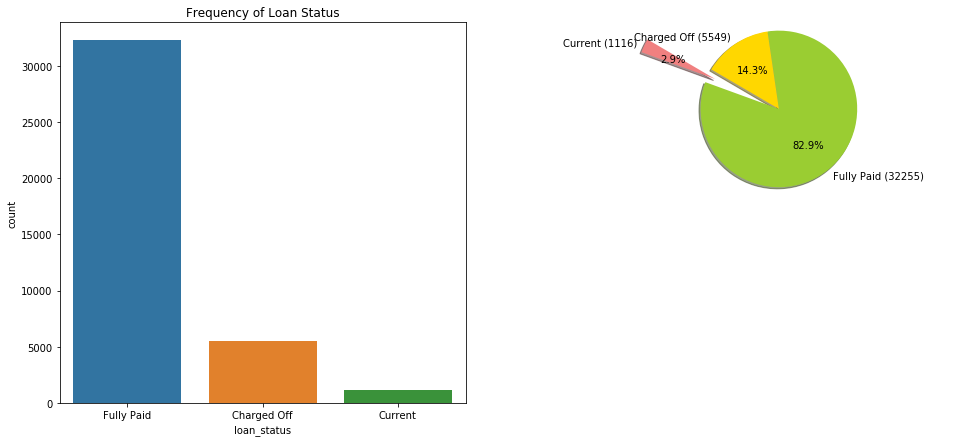

In [48]:
# Analysis of loan status
loan_status = pd.DataFrame(loan['loan_status'].value_counts())
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(x='loan_status',data=loan)
plt.title("Frequency of Loan Status")


# Data's to plot
chart_label_loan_status = ["Fully Paid (" + str(loan_status.loc['Fully Paid'].values[0]) + ')',
                           "Charged Off (" + str(loan_status.loc['Charged Off'].values[0]) + ')',
                           "Current (" + str(loan_status.loc['Current'].values[0]) + ')']

colors = ['yellowgreen','gold', 'lightcoral']
explode = (0, 0, 0.9)  # explode 1st slice

# Plot pie chart
plt.subplot(2,2,2)
plt.pie(loan_status, explode=explode, labels=chart_label_loan_status, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.show()

Inference: Most of the loans in the data set are fully paid and only a small percentage of loans are current loans.

Number of unique address to which borrower belong:  894


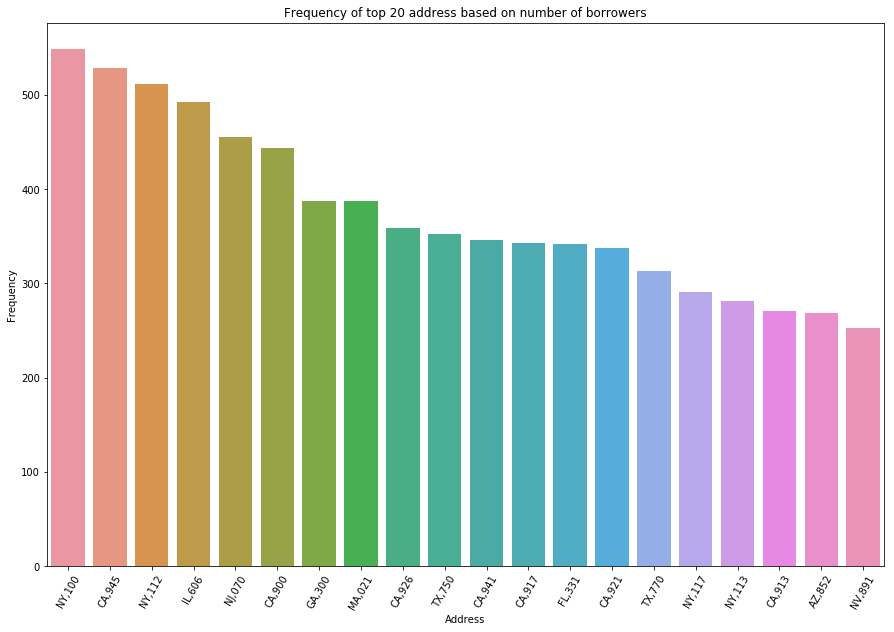

In [49]:
# Univaritate analysis of address(combination of zipcode and state)
print("Number of unique address to which borrower belong: ",loan.address.nunique())

#Frequency Chart 
plt.figure(figsize=(15, 10))

#Plotting top 20 address(State and zip code) based on borrowers whom loan is given
address_values = pd.DataFrame(loan['address'].value_counts())[:20]

sns.barplot(x=address_values.index, y="address", data=address_values)
plt.xlabel("Address")
plt.ylabel("Frequency")
plt.title('Frequency of top 20 address based on number of borrowers')
plt.xticks(rotation=60)
plt.show()

Inference:
Maximum number of borrowers are from address NY,100 of loans to whom loans are given

# Derived Mertics

## Business Driven Metrics : loan_default_status

In [50]:
# Define a new cloumn loan_default_status which categorises the loan_status into 2 categories
# "Defaulter"(if loan status is "charged off" and Non-Defaulter if loan status is "Fully Paid" or "Current
loan['loan_default_status'] = loan['loan_status'].apply(lambda x: 'Defaulter' if x == 'Charged Off' else 'Non-Defaulter') 
print(loan.groupby('loan_default_status')['loan_default_status'].count(),'\n\n')
loan.info()

loan_default_status
Defaulter         5549
Non-Defaulter    33371
Name: loan_default_status, dtype: int64 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38920 entries, 0 to 39716
Data columns (total 24 columns):
loan_amnt                  38920 non-null int64
funded_amnt_inv            38920 non-null float64
term                       38920 non-null object
int_rate                   38920 non-null float64
installment                38920 non-null float64
grade                      38920 non-null object
emp_length                 38920 non-null float64
home_ownership             38920 non-null object
annual_inc                 38920 non-null float64
verification_status        38920 non-null object
issue_d                    38920 non-null datetime64[ns]
loan_status                38920 non-null object
purpose                    38920 non-null object
zip_code                   38920 non-null object
addr_state                 38920 non-null object
dti                        38920 no

## Data Driven Metrics : instal_income_perc

In [51]:
# Define a new cloumn instal_income_perc which is the ratio of installment monthly income(annual_inc/12) multplied by 100
loan['instal_income_perc'] = ((loan['installment'])/(loan['annual_inc']/12))*100
loan.head(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,address,is_pub_rec_bankruptcies,loan_default_status,instal_income_perc
0,5000,4975.0,36 months,10.65,162.87,B,10.0,RENT,24000.0,Verified,...,27.65,0,3,0,83.7,0.0,"AZ,860",0,Non-Defaulter,8.143500
1,2500,2500.0,60 months,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,...,1.00,0,3,0,9.4,0.0,"GA,309",0,Defaulter,2.393200
2,2400,2400.0,36 months,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,...,8.72,0,2,0,98.5,0.0,"IL,606",0,Non-Defaulter,8.259549
3,10000,10000.0,36 months,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,...,20.00,0,10,0,21.0,0.0,"CA,917",0,Non-Defaulter,8.275854
4,3000,3000.0,60 months,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,...,17.94,0,15,0,53.9,0.0,"OR,972",0,Non-Defaulter,1.016850
5,5000,5000.0,36 months,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,...,11.20,0,9,0,28.3,0.0,"AZ,852",0,Non-Defaulter,5.215333
6,7000,7000.0,60 months,15.96,170.08,C,8.0,RENT,47004.0,Not Verified,...,23.51,0,7,0,85.6,0.0,"NC,280",0,Non-Defaulter,4.342099
7,3000,3000.0,36 months,18.64,109.43,E,9.0,RENT,48000.0,Source Verified,...,5.35,0,4,0,87.5,0.0,"CA,900",0,Non-Defaulter,2.735750
8,5600,5600.0,60 months,21.28,152.39,F,4.0,OWN,40000.0,Source Verified,...,5.55,0,11,0,32.6,0.0,"CA,958",0,Defaulter,4.571700
9,5375,5350.0,60 months,12.69,121.45,B,0.0,RENT,15000.0,Verified,...,18.08,0,2,0,36.5,0.0,"TX,774",0,Defaulter,9.716000


## Type Driven Metrics : interest_rate_bracket

In [52]:
# Define a bracket for interested rate and see how each bracket is performing against loan status
loan['interest_rate_bracket'] = loan['int_rate'].apply(lambda x :'0-5' if x <=5 else ('5-10' if x<=10 else ('10-15' if x <=15 else ('15-20' if x<=20 else('20-25' if x <=25 else '25+')))))
loan[['int_rate','interest_rate_bracket']].head(10)

,int_rate,interest_rate_bracket
0,10.65,10-15
1,15.27,15-20
2,15.96,15-20
3,13.49,10-15
4,12.69,10-15
5,7.90,5-10
6,15.96,15-20
7,18.64,15-20
8,21.28,20-25
9,12.69,10-15


# Segmented Univariate Analysis

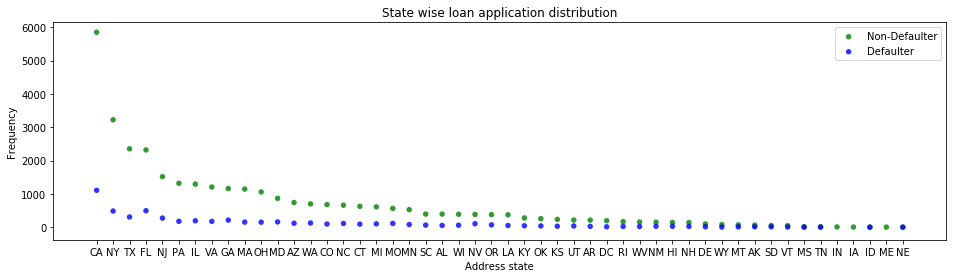

In [53]:
# The Variable addr_state is an Unordered Categorical 
# lets do a segmented analysis on loan_status using this variable
# Rank-frequency plots of unordered categorical variables, when plotted on a log-log scale,typically result in a power law distribution
# Create data
g1 = pd.DataFrame(loan[loan.loan_default_status == 'Non-Defaulter']['addr_state'].value_counts())
g2 = pd.DataFrame(loan[loan.loan_default_status == 'Defaulter']['addr_state'].value_counts())

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
x1 = g1.index
x2 = g2.index
y1 = g1['addr_state']
y2 = g2['addr_state']

ax.scatter(x1, y1, alpha=0.8, c='green', edgecolors='none', s=30, label='Non-Defaulter')
ax.scatter(x2, y2, alpha=0.8, c='blue', edgecolors='none', s=30, label='Defaulter')

plt.title('State wise loan application distribution')
plt.legend(['Non-Defaulter','Defaulter'])
plt.xlabel('Address state')
plt.ylabel('Frequency')

plt.show()

-  Inference:
    - The state CA has most of the loans,'Non-Defaulted' loans and'Defaulted' loans
-   Conclusion: 
    - State CA tops in both Non-Defaulter and Defaulter catagories of loans.

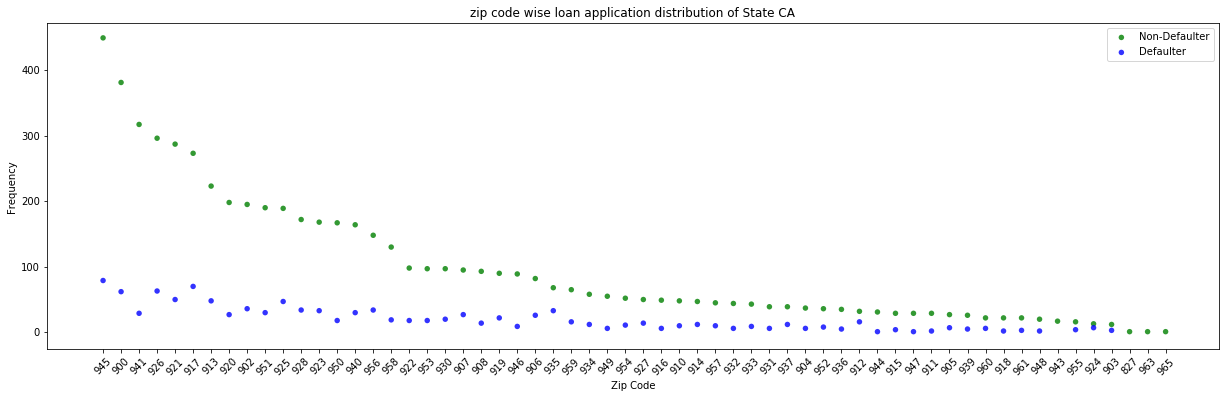

In [54]:
# The Variable zip_code is an Unordered Categorical variable
# Rank-frequency plots of unordered categorical variables, when plotted on a log-log scale,typically result in a power law distribution
# Create data
CA = pd.DataFrame(loan[loan.addr_state == 'CA'])

g1 = pd.DataFrame(CA[CA.loan_default_status == 'Non-Defaulter']['zip_code'].value_counts())
g2 = pd.DataFrame(CA[CA.loan_default_status == 'Defaulter']['zip_code'].value_counts())
fig = plt.figure(figsize=(21,6))
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
x1 = g1.index
x2 = g2.index
y1 = g1['zip_code']
y2 = g2['zip_code']

ax.scatter(x1, y1, alpha=0.8, c='green', edgecolors='none', s=30, label='Non-Defaulter')
ax.scatter(x2, y2, alpha=0.8, c='blue', edgecolors='none', s=30, label='Defaulter')

plt.title('zip code wise loan application distribution of State CA')
plt.legend(['Non-Defaulter','Defaulter'])
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

- Inference:
    - The zip code '945' in state CA has most of the loans...
    - The zip code '945' in state CA has most of the Non-Defaulted loans...
    - The zip code '945' in state CA has most of the Defaulted loans...
- Conclusion: 
    - zip code '945' at State CA tops in Non-Defaulter and Defaulter catagories of loans

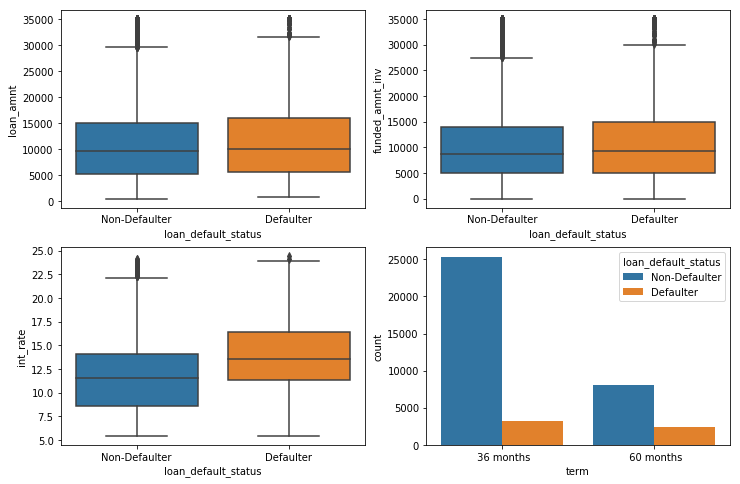

In [55]:
# Segmented analysis based on loan status for loan amount, funded amount and interest rate
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="loan_default_status", y="loan_amnt", data=loan)

plt.subplot(2, 2, 2)
sns.boxplot(x="loan_default_status",  y="funded_amnt_inv", data=loan)

plt.subplot(2, 2, 3)
sns.boxplot(x="loan_default_status", y="int_rate", data=loan)

plt.subplot(2, 2, 4)
#sns.boxplot(x="loan_default_status", y="term", data=loan)
sns.countplot("term",hue='loan_default_status',data=loan)

plt.show()

- Inference:
    - The loan_amnt and funded_amnt_inv has almost equal spread and median for defaulted and non-defaulted loans...
    - The interest rate bracket for defaulted loans is clearly higher than non-defaulted loans...
    - Percentage of loans Defaulted are high for 60 months interval...
- Conclusion: 
    - 60 months term loans and higher interest loans have maximum chances of defaulting

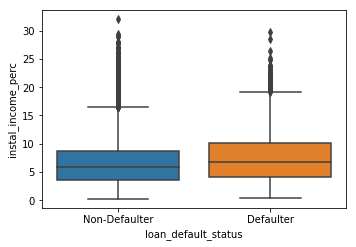

In [56]:
# Segmented univariate for instal_income_perc for each loan_default_status
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x="loan_default_status", y="instal_income_perc", data=loan)
plt.show()

- Inference:
    - The installment to income perc is slightly higher for defaulted loans than non-defaulted loans

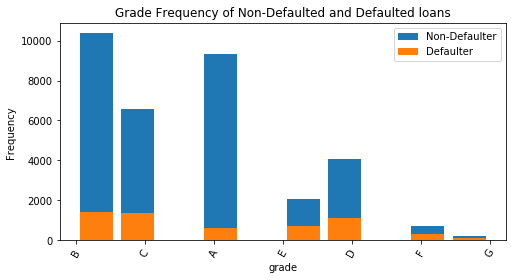

In [57]:
# Segmented Analysis of sub grade
plt.figure(figsize=(8,4))
#Frequency Chart
sub_grade_fp = loan[loan.loan_default_status == 'Non-Defaulter'].grade
sub_grade_co = loan[loan.loan_default_status == 'Defaulter'].grade

plt.hist([sub_grade_fp], bins=10, rwidth=0.80)
plt.hist([sub_grade_co], bins=10, rwidth=0.80)


plt.xlabel("grade")
plt.ylabel("Frequency ")
plt.legend(loan.loan_default_status)
plt.xticks(rotation=60)
plt.title('Grade Frequency of Non-Defaulted and Defaulted loans')

plt.show()

- Inference:
    - Lower the sub-grade higher is the chances of defaulting

Get the percentage of defaults for each of  the loan brackets

loan_default_status    Defaulter  Non-Defaulter
interest_rate_bracket                          
10-15                      14.54          85.46
15-20                      23.63          76.37
20-25                      34.59          65.41
5-10                        6.73          93.27


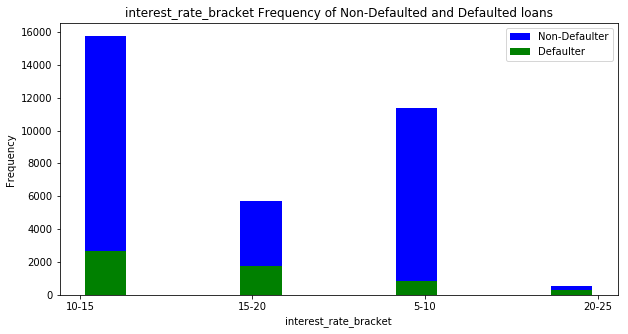

In [58]:
# Segmented univariate for interest_rate_bracket for each loan_default_status
print("Get the percentage of defaults for each of  the loan brackets\n")
loan_stat_per_interest_bracket = pd.crosstab(loan['interest_rate_bracket'],loan['loan_default_status']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
print(loan_stat_per_interest_bracket);

#Frequency Chart
emp_length_fp = loan[loan.loan_default_status == 'Non-Defaulter'].interest_rate_bracket
emp_length_co = loan[loan.loan_default_status == 'Defaulter'].interest_rate_bracket

plt.figure(figsize=(10, 5))

plt.hist([emp_length_fp], bins=10, rwidth=0.80, color='blue')
plt.hist([emp_length_co], bins=10, rwidth=0.80, color='green')

plt.xlabel("interest_rate_bracket")
plt.ylabel("Frequency ")
plt.legend(loan.loan_default_status, loc='upper right')
plt.title('interest_rate_bracket Frequency of Non-Defaulted and Defaulted loans')

plt.show()


- Inference: 
    - Nearly 35% of loans in the interest bracket 20-25% have been defaulted followed by 15-20% interest bracket which has defaulted loan of 24%

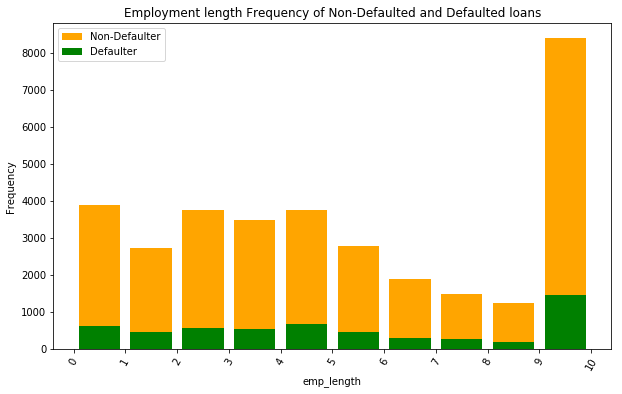

In [59]:
# Segmented analysis of employment length
#Frequency Chart
emp_length_fp = loan[loan.loan_default_status == 'Non-Defaulter'].emp_length
emp_length_co = loan[loan.loan_default_status == 'Defaulter'].emp_length

plt.figure(figsize=(10, 6))

plt.hist([emp_length_fp], bins=10, rwidth=0.80, color='orange')
plt.hist([emp_length_co], bins=10, rwidth=0.80, color='green')

plt.xlabel("emp_length")
plt.ylabel("Frequency ")
plt.legend(loan.loan_default_status, loc='upper left')
plt.xticks(np.arange(min(emp_length_co), max(emp_length_co)+1, 1), rotation=60)
plt.title('Employment length Frequency of Non-Defaulted and Defaulted loans')

plt.show()

- Inference:
    - Lower experience employees tend to default more on loan payment than high experience employees

Get the percentage of defaults for each of  the verification status category

loan_default_status  Defaulter  Non-Defaulter
verification_status                          
Not Verified             12.66          87.34
Source Verified          14.50          85.50
Verified                 16.23          83.77
Verification statuses unique values  ['Verified' 'Source Verified' 'Not Verified']


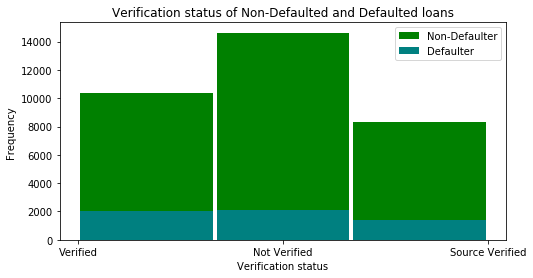

In [60]:
# Segmented Analysis of Verification status
print("Get the percentage of defaults for each of  the verification status category\n")
loan_stat_for_verification = pd.crosstab(loan['verification_status'],loan['loan_default_status']).apply(lambda r: round((r/r.sum()*100),2), axis=1)
print(loan_stat_for_verification)
print('Verification statuses unique values ', loan.verification_status.unique())

verification_status_fp = loan[loan.loan_default_status == 'Non-Defaulter'].verification_status
verification_status_co = loan[loan.loan_default_status == 'Defaulter'].verification_status

plt.figure(figsize=(8,4))

plt.hist([verification_status_fp], bins=verification_status_fp.nunique(), rwidth=0.97, color='green')
plt.hist([verification_status_co], bins=verification_status_co.nunique(), rwidth=0.97, color='teal')

plt.xlabel("Verification status")
plt.ylabel("Frequency ")
plt.legend(loan.loan_default_status)
plt.xticks()
plt.title('Verification status of Non-Defaulted and Defaulted loans')

plt.show()

- Inference:
    - Maxiumum percentage(16%) of loans sanctioned in "Verified" category have been defaulted in loan while Not Verified have the least(12%)

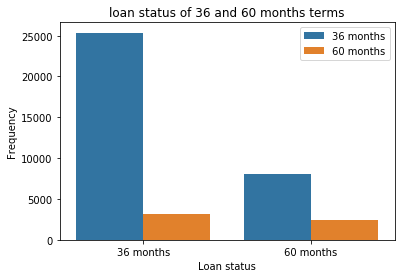

In [61]:
# Segmented analysis of term

loan['term'] = loan['term'].str.strip()
sns.countplot("term",hue='loan_default_status',data=loan)

plt.xlabel("Loan status")
plt.ylabel("Frequency")
plt.legend(loan.term)
plt.title('loan status of 36 and 60 months terms')
plt.show()

- Inference:
    - The defaulted loans has mostly 60 months term.

# Bivariate Analysis

In [62]:
loan['loan_status_numeric'] = np.where(loan['loan_status'] == 'Charged Off', 1, 0)

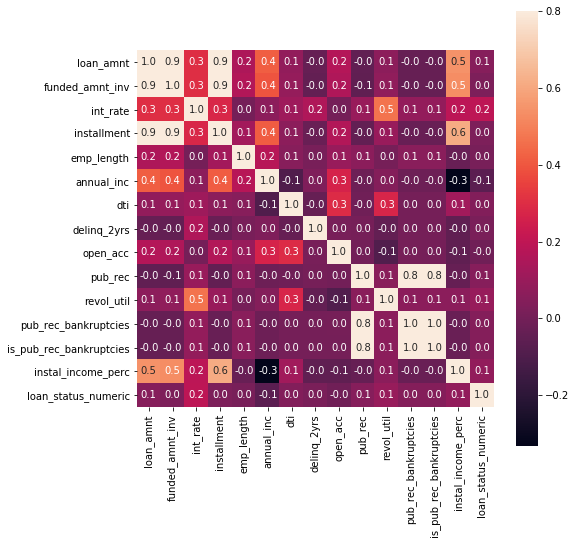

In [63]:
# Bivariate Correlation metrics for all the quantitative fields
plt.subplots(figsize=(8,8))
sns.heatmap(loan.corr(), vmax=.8, square=True, annot=True, fmt='.1f')
plt.show()

- There are no strong correlation observed between different fields except for loan_amount, installment and funded_amnt_inv which is expected and obvious

## Bivariate analysis on continuous variables

In [64]:
# Create 2 data frame one for Non-Defaulter and another for Defaulter
fully_paid_df = pd.DataFrame(loan[loan.loan_default_status == 'Non-Defaulter']).reset_index()
charged_off_df = pd.DataFrame(loan[loan.loan_default_status == 'Defaulter']).reset_index()

The correlation of loan amount and funded amount inv is  0.91


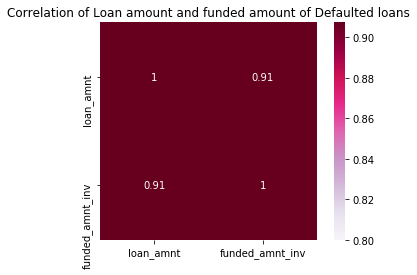

In [65]:
# Correlation of Loan amount and funded amount of Defaulted loans
loan_fund_amnt = pd.DataFrame({'loan_amnt': charged_off_df['loan_amnt'], 'funded_amnt_inv': charged_off_df['funded_amnt_inv']})
corrcoefficiant = pearsonr(loan_fund_amnt['loan_amnt'], loan_fund_amnt['funded_amnt_inv'])
print("The correlation of loan amount and funded amount inv is ",
      round(corrcoefficiant[0], 2))

sns.heatmap(loan_fund_amnt.corr(), vmax=.8, square=True, annot=True, cmap='PuRd')
plt.title('Correlation of Loan amount and funded amount of Defaulted loans')
plt.show()

The correlation of loan amount and funded amount is  0.95


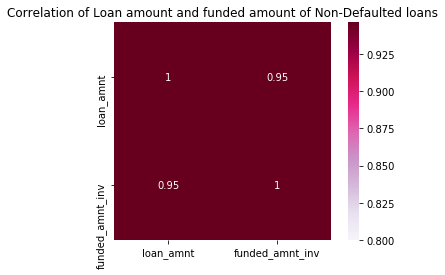

In [66]:
# Correlation of Loan amount and funded amount of Non-Defaulted loans
loan_fund_amnt = pd.DataFrame({'loan_amnt': fully_paid_df['loan_amnt'], 'funded_amnt_inv': fully_paid_df['funded_amnt_inv']})
corrcoefficiant = pearsonr(loan_fund_amnt['loan_amnt'], loan_fund_amnt['funded_amnt_inv'])
print("The correlation of loan amount and funded amount is ", round(corrcoefficiant[0], 2))

sns.heatmap(loan_fund_amnt.corr(), vmax=.8, square=True, annot=True, cmap='PuRd')
plt.title('Correlation of Loan amount and funded amount of Non-Defaulted loans')
plt.show()

## Bivariate analysis on categorical variables

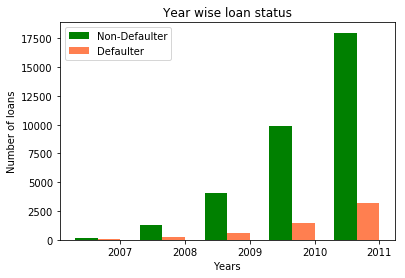

In [67]:
# Analysis of year and loan status
issue_d_fp = fully_paid_df.groupby(fully_paid_df.issue_d.dt.year).size()
issue_d_co = charged_off_df.groupby(charged_off_df.issue_d.dt.year).size()

ind = np.arange(max(len(issue_d_fp), len(issue_d_co)))  # the x locations for the groups
width = 0.35                                            # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ind-width,issue_d_fp,width,color='green',label='Non-Defaulter')
ax.bar(ind,issue_d_co,width,color='coral',label='Defaulter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (issue_d_fp.index) )

plt.xlabel('Years')
plt.ylabel('Number of loans')
plt.title('Year wise loan status')
plt.legend()

plt.show()

- Inference:
    - Year 2011 has most loans on both catagories.

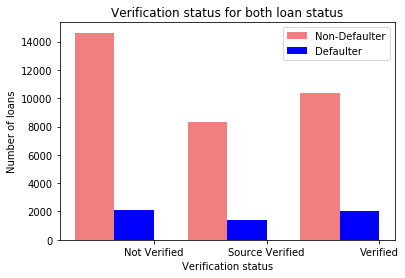

In [68]:
# Analysis of Verification Status and Loan Status
verification_status_fp = fully_paid_df.groupby(fully_paid_df.verification_status).size()
verification_status_co = charged_off_df.groupby(charged_off_df.verification_status).size()

ind = np.arange(max(len(verification_status_fp), len(verification_status_co)))  # the x locations for the groups
width = 0.35                                                                    # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(ind-width, verification_status_fp, width, color='lightcoral', label='Non-Defaulter')
ax.bar(ind, verification_status_co, width, color='blue', label='Defaulter')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (verification_status_fp.index) )

plt.xlabel('Verification status')
plt.ylabel('Number of loans')
plt.title('Verification status for both loan status')
plt.legend()

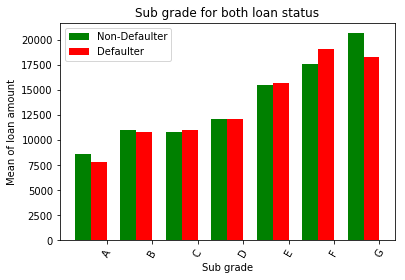

In [69]:
# Analysis of Sub Grade and loan status
# grouby(grade,loan_status) take average  of loan_amount

g1 = fully_paid_df.groupby(fully_paid_df.grade).loan_amnt.mean()
g2 = charged_off_df.groupby(charged_off_df.grade).loan_amnt.mean()

xlabel = 'Sub grade'
ylabel = 'Mean of loan amount'
title = 'Sub grade for both loan status'

ind = np.arange(max(len(g1), len(g2)))  # the x locations for the groups
width = 0.35                            # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind-width, g1, width, color='green', label='Non-Defaulter')
ax.bar(ind, g2, width, color='red', label='Defaulter')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (g1.index) )

plt.xticks(rotation=60)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

plt.show()

- Inference:
    - Lower the grade higher is the average loan amount and risk for defaulting except for few exceptions

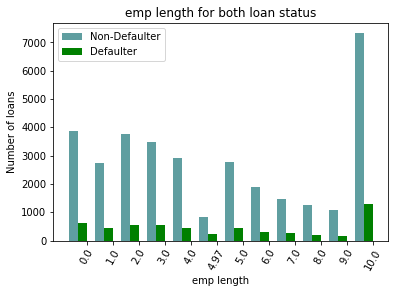

In [70]:
# Analysis of Employment duration and loan status
# grouby(emp_length,loan_status) take average  of loan_amount

g1 = round(fully_paid_df.groupby(fully_paid_df.emp_length).size())
g2 = round(charged_off_df.groupby(charged_off_df.emp_length).size())

xlabel = 'emp length'
ylabel = 'Number of loans'
title = 'emp length for both loan status'

ind = np.arange(max(len(g1), len(g2)))  # the x locations for the groups
width = 0.35                            # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind-width, g1, width, color='cadetblue', label='Non-Defaulter')
ax.bar(ind, g2, width, color='green', label='Defaulter')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (g1.index) )

plt.xticks(rotation=60)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

plt.show()

- Inference:
    - Employees with longer duration are processing more loans in both catagories
    - There is no much deviation in defaulting rate based on employees’ experience.

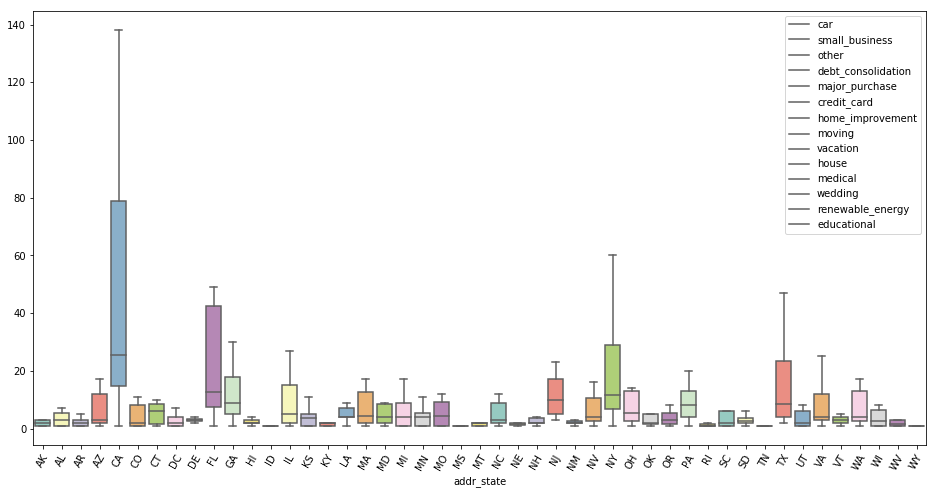

In [71]:
# Analysis of state, purpose and loan status
# Groupby(State, purpose, loan_status) : Take count of loan_status
# Create pivot table first
charged_off_df["purpose"] = charged_off_df["purpose"].astype("category")
charged_off_pvt_df = pd.pivot_table(charged_off_df, index=["purpose"], values="loan_status", columns="addr_state", aggfunc=[len])
charged_off_pvt_df.columns = charged_off_pvt_df.columns.droplevel(0)

# Plot
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=charged_off_pvt_df, showfliers=False, palette="Set3")
plt.xticks(rotation=60)
plt.legend(charged_off_pvt_df.index, loc=1)
plt.show()

- Inference:
    - The loan taken for debt consolidation has highest chances of defaulting
    - The state CA has highest percentage of defaulters

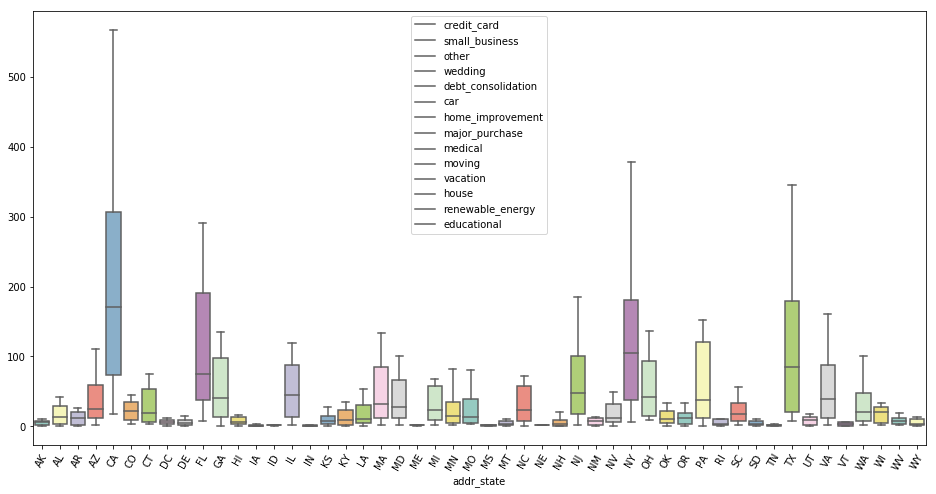

In [72]:
# Second pivot table
fully_paid_df["purpose"] = fully_paid_df["purpose"].astype("category")
fully_paid_pvt_df = pd.pivot_table(fully_paid_df, index=["purpose"], values="loan_status", columns="addr_state", aggfunc=[len])
fully_paid_pvt_df.columns = fully_paid_pvt_df.columns.droplevel(0)

# Plot
plt.figure(figsize=(16,8))
sns.boxplot(data=fully_paid_pvt_df, showfliers=False, palette="Set3")
plt.xticks(rotation=60)
plt.legend(fully_paid_pvt_df.index)
plt.show()

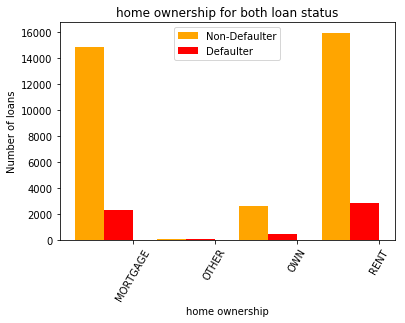

In [73]:
# Analysis of home owner and loan status

g1 = round(fully_paid_df.groupby(fully_paid_df.home_ownership).size())
g2 = round(charged_off_df.groupby(charged_off_df.home_ownership).size())

xlabel = 'home ownership'
ylabel = 'Number of loans'
title = 'home ownership for both loan status'

ind = np.arange(max(len(g1), len(g2)))  # the x locations for the groups
width = 0.35                            # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(ind-width, g1, width, color='orange', label='Non-Defaulter')
ax.bar(ind, g2, width, color='red', label='Defaulter')

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( (g1.index) )

plt.xticks(rotation=60)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

plt.show()

- Inference:
    - Applicant who are in rental homes are more likely to default followed by mortgaged home owners

In [74]:
# Analysis of verification status and loan status based on annual income
# Groupby(verification status,loan_status) : Take average of annual_inc
# Create pivot table first
charged_off_pvt_df = pd.pivot_table(charged_off_df, index=["verification_status"], values="annual_inc", columns="loan_default_status", aggfunc=[np.mean])
charged_off_pvt_df.columns = charged_off_pvt_df.columns.droplevel(0)
charged_off_pvt_df

loan_default_status,Defaulter
verification_status,
Not Verified,52635.181697
Source Verified,57112.503800
Verified,66787.825280


In [75]:
# Analysis of the verification_status group(Not verified,source verified,verified), Fully paid always has higher average annual_inc than charged off
fully_paid_pvt_df = pd.pivot_table(fully_paid_df, index=["verification_status"], values="annual_inc", columns="loan_default_status", aggfunc=[np.mean])
fully_paid_pvt_df.columns = fully_paid_pvt_df.columns.droplevel(0)
fully_paid_pvt_df

loan_default_status,Non-Defaulter
verification_status,
Not Verified,58669.808540
Source Verified,63014.910050
Verified,75343.250518


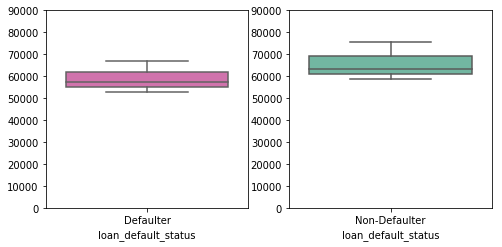

In [76]:
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
sns.boxplot(data=charged_off_pvt_df, showfliers=False, palette="PuRd").set_ylim(0, 90000)
plt.subplot(2, 2, 2)
sns.boxplot(data=fully_paid_pvt_df, showfliers=False, palette="Set2").set_ylim(0, 90000)
plt.xticks()
plt.show()

In [77]:
loan_status_pvt_df = pd.pivot_table(loan, index=["interest_rate_bracket"], values="instal_income_perc", columns=["loan_default_status","term"], aggfunc=[np.median])
loan_status_pvt_df.columns = loan_status_pvt_df.columns.droplevel(0)
print("\nInference from below table:\n\t For each term loan the installment to income ratio of each of the interest slabs  are as below.\n\t This influences whether a loan is likely to be defaulted or not:\n")
loan_status_pvt_df


Inference from below table:
	 For each term loan the installment to income ratio of each of the interest slabs  are as below.
	 This influences whether a loan is likely to be defaulted or not:



loan_default_status   Defaulter           Non-Defaulter          
term                  36 months 60 months     36 months 60 months
interest_rate_bracket                                            
10-15                  6.594200  6.645357      6.132338  5.800984
15-20                  7.258667  7.203643      7.100320  6.657143
20-25                  9.570312  9.347769      7.218121  8.037000
5-10                   5.415128  4.921428      4.951257  3.875707

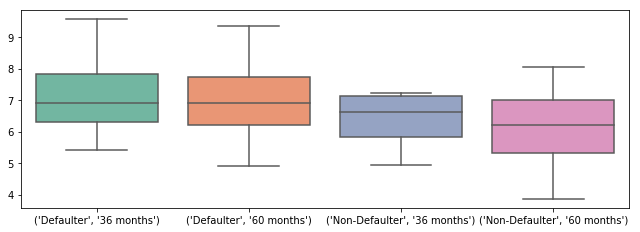

In [78]:
plt.figure(figsize=(24,8))

plt.subplot(2, 2, 1)
sns.boxplot(data=loan_status_pvt_df, showfliers=False, palette="Set2")
plt.show()

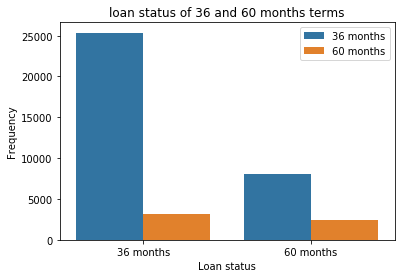

In [79]:
loan['term'] = loan['term'].str.strip()
sns.countplot("term",hue='loan_default_status',data=loan)

plt.xlabel("Loan status")
plt.ylabel("Frequency")
plt.legend(loan.term)
plt.title('loan status of 36 and 60 months terms')
plt.show()

is_pub_rec_bankruptcies      0     1
loan_default_status                 
Defaulter                 5183   366
Non-Defaulter            32069  1302


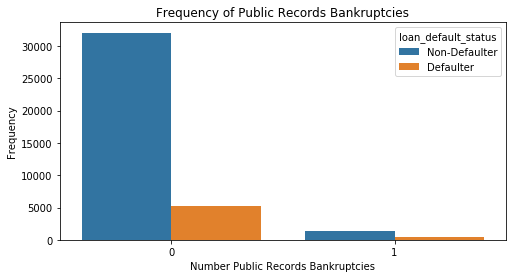

In [80]:
# Number of Public Records Bankruptcies
print(pd.pivot_table(loan, index="loan_default_status", columns="is_pub_rec_bankruptcies", aggfunc="size"))

plt.figure(figsize=(8,4))

sns.countplot("is_pub_rec_bankruptcies",hue='loan_default_status',data=loan)
plt.xlabel("Number Public Records Bankruptcies")
plt.ylabel("Frequency")
plt.title('Frequency of Public Records Bankruptcies')
plt.show()

In [81]:
print(f"Percentage of charged off in not public bankrupt: {round((5183)/(5183+32069) * 100, 2)}%")
print(f"Percentage of charged off in public bankrupt: {round((366)/(366+1302) * 100, 2)}%")

Percentage of charged off in not public bankrupt: 13.91%
Percentage of charged off in public bankrupt: 21.94%


Inference:
    Those person has pub_rec_bankruptcies record is more likely to default with 22% 0ver 14%

In [82]:
loan.to_csv('loandata_cleaned.csv')

In [83]:
print(pd.pivot_table(loan, index="loan_default_status", columns="is_pub_rec_bankruptcies", aggfunc="size"))

is_pub_rec_bankruptcies      0     1
loan_default_status                 
Defaulter                 5183   366
Non-Defaulter            32069  1302
